### Context & Problems
- Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates.To solve this problem he collects sales data of mobile phones of various companies.


### Goals
- Helping Bob to to estimate price of mobiles his company creates.

In this data:
id:ID  
battery_power:Total energy a battery can store in one time measured in mAh  
blue:Has bluetooth or not  
clock_speed:speed at which microprocessor executes instructions  
dual_sim:Has dual sim support or not  
fc:Front Camera mega pixels  
four_g:Has 4G or not  
int_memory:Internal Memory in Gigabytes  
m_dep:Mobile Depth in cm  
mobile_wt:Weight of mobile phone  
n_cores:Number of cores of processor  
pc:Primary Camera mega pixels  
px_height:Pixel Resolution Height  
px_width:Pixel Resolution Width  
ram:Random Access Memory in Megabytes  
sc_h:Screen Height of mobile in cm  
sc_w:Screen Width of mobile in cm  
talk_time:longest time that a single battery charge will last when you are  
three_g:Has 3G or not  
touch_screen:Has touch screen or not  
wifi:Has wifi or not  
price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Import Common Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap, FastMarkerCluster
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

Read Data

In [3]:
df = pd.read_csv('mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Quick Glance at data information

In [303]:
df.info()

## The data has 2000 entries, 21 columns all in numerical types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Statistical Data Description

In [9]:
df.describe().T

# from the values of blue, dual_sim, four_g, three_g, touch_screen and wifi we can see that those are a binary features. 
# fc and px_height from their significant differences between q3 and max values indicates there will be an outliers.
# We also can see in fc and pc there were 0 values, which I assumed a phone with no primary or front camera

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Checking Data Types, Missing Values, Total Unique and Unique Values

In [11]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].unique()
    ])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

#### There are no missing values detected. The data types all in numerical.

,Features,D types,Null,Null%,Unique,Unique Value
0,battery_power,int64,0,0.0,1094,"[842, 1021, 563, 615, 1821, 1859, 1954, 1445, ..."
1,blue,int64,0,0.0,2,"[0, 1]"
2,clock_speed,float64,0,0.0,26,"[2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, ..."
3,dual_sim,int64,0,0.0,2,"[0, 1]"
4,fc,int64,0,0.0,20,"[1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8..."
5,four_g,int64,0,0.0,2,"[0, 1]"
6,int_memory,int64,0,0.0,63,"[7, 53, 41, 10, 44, 22, 24, 9, 33, 17, 52, 46,..."
7,m_dep,float64,0,0.0,10,"[0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, ..."
8,mobile_wt,int64,0,0.0,121,"[188, 136, 145, 131, 141, 164, 139, 187, 174, ..."
9,n_cores,int64,0,0.0,8,"[2, 3, 5, 6, 1, 8, 4, 7]"


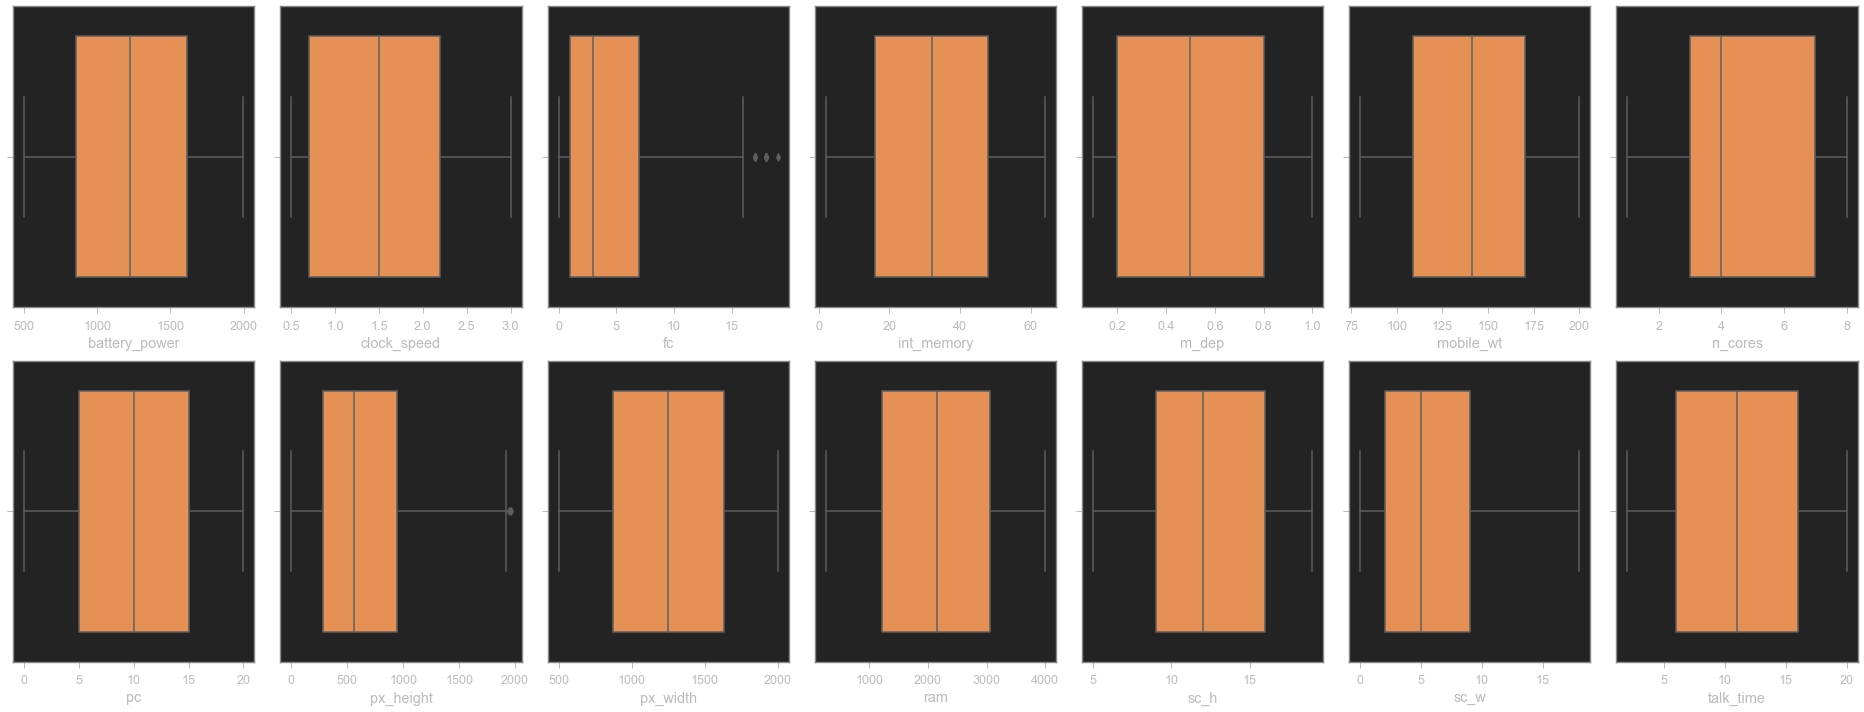

In [304]:
# Checking outliers in non binary features
desc = df.drop(columns = ['blue', 'dual_sim', 'four_g','three_g','touch_screen','wifi','price_range'])

plt.figure(figsize =(26, 10))

for col,column in enumerate (desc.columns):
    plt.subplot(2,7,col+1)
    sns.boxplot(data = df_des, x=desc[column],palette='YlOrRd')

plt.tight_layout()
plt.show()

# As mentioned before, there were an outliers in fc and px heights columns
# But the outliers seems reasonably normal because the outliers not really far from the upper fence

Checking the pc and fc 0 values

In [370]:
df[(df['pc']==0) & (df['fc']==0)]

## After looking at the data, phone with 0 megapixel primary camera also have 0 values of  front camera which strengthen my assumptions that these are phones with no camera.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
52,1654,1,1.5,1,0,1,43,0.3,109,2,0,546,629,3112,12,5,10,1,1,0,3
54,1073,1,0.5,1,0,0,51,0.5,145,7,0,690,804,2908,6,0,18,0,1,0,2
62,1156,1,1.2,1,0,1,50,0.8,159,2,0,322,547,470,7,0,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1807,0,0.8,1,0,1,38,0.2,97,8,0,1332,1814,1069,7,6,7,1,0,0,1
1911,1259,0,1.2,1,0,0,13,0.5,97,2,0,1210,1989,340,17,13,4,1,0,1,0
1931,1854,0,0.9,1,0,1,33,0.4,195,1,0,665,718,1675,14,12,9,1,0,1,1
1968,1667,0,1.0,1,0,1,21,0.9,138,2,0,1211,1396,635,17,7,15,1,0,0,0


## Exploratory Data Analysis

### Initial Hypothesis
- ram
- int_memory
- n_cores
- pc
- fc
- battery_power
- mobile_wt

The above mentioned features are the common features that usually have influence on the price of a phone

### Univariate analysis

In [43]:
# For better analysis and visualization, I will recategorize/binning some of the features.

df1=df.copy() # copy of the original data frame

In [44]:
# Binning the ram into category of ram in familiar way

bin_ram = [250,  512, 1024, 2048, 3072, 4096]
label = ['up to 512MB','up to 1GB ','up to 2GB', 'up to 3GB','up to 4GB']
df1['bin_ram'] = pd.cut(df1['ram'], bins = bin_ram, labels = label)

In [45]:
(df1['bin_ram'].value_counts(normalize=True)*100).sort_values(ascending=False).round(2)

# The majority of the phones in the data were 2 up to 4 GB of ram
# Phone up to 3GB share the most phone in data with 27.8% followed by the 2GB phones with 27.1% of shares.
# Only 20% of the data were phone with less than 1GB of ram

up to 3GB      27.75
up to 2GB      27.10
up to 4GB      24.85
up to 1GB      13.15
up to 512MB     7.15
Name: bin_ram, dtype: float64

In [46]:
# Binning the internal Memory into category of Internal memory in familiar way

bin_int_mem = [1,  4, 8, 16, 32, 64]
label1 = ['up to 4GB','up to 8GB', 'up to 16GB','up to 32GB', 'up to 64GB']
df1['bin_int_mem'] = pd.cut(df1['int_memory'], bins = bin_int_mem, labels = label1)

In [47]:
(df1['bin_int_mem'].value_counts(normalize=True)*100).sort_values(ascending=False).round(2)

# The majority of the phones in the data were up to 64GB internal memory with 48.7%
# Less than 10% of data were below 8GB of internal memory

up to 64GB    48.70
up to 32GB    25.00
up to 16GB    14.45
up to 8GB      7.50
up to 4GB      4.35
Name: bin_int_mem, dtype: float64

In [48]:
(df1['n_cores'].value_counts(normalize=True)*100).sort_values(ascending=False).round(2)

# The data distribute quite evenly matched between cores
# Phone with 4 cores processor is the most phone than others with 13.7% of the shares.

4    13.70
7    12.95
8    12.80
2    12.35
3    12.30
5    12.30
1    12.10
6    11.50
Name: n_cores, dtype: float64

In [49]:
# Binning the primary camera into no camera and 1-5 mp, 6-10 mp, 11-15 mp, 15-20 mp

bin_pc = [-1,  0, 5, 10, 15, 20]
label2 = ['no camera','1-5 mp', '6-10 mp','11-15 mp', '15-20 mp']
df1['bin_pc'] = pd.cut(df1['pc'], bins = bin_pc, labels = label2)

In [50]:
(df1['bin_pc'].value_counts(normalize=True)*100).sort_values(ascending=False).round(2)

# Phone with 6-10 mp pc of phone is the most in this dataset
# phone with no camera is only 5% of shares

6-10 mp      26.85
15-20 mp     23.10
1-5 mp       22.50
11-15 mp     22.50
no camera     5.05
Name: bin_pc, dtype: float64

In [51]:
# Binning the front camera into no camera , 1 - 10 mp and 11 - 20 mp

bin_fc = [-1,  0, 10,  20]
label3 = ['no camera','1-10 mp', '11-20 mp']
df1['bin_fc'] = pd.cut(df1['fc'], bins = bin_fc, labels = label3)

In [52]:
(df1['bin_fc'].value_counts(normalize=True)*100).sort_values(ascending=False).round(2)

# The majority of phone in this dataset have 1 upto 10 megapixels
# The total of phone with no front camera are more than phone with 11 - 20 megapixels
# this also indicates that there are phones with primary camera but doesnt have front camera

1-10 mp      65.25
no camera    23.70
11-20 mp     11.05
Name: bin_fc, dtype: float64

In [53]:
# Binning the battery power into 3 category

bin_bp = [500,  1000, 1500,  2000]
label4 = ['up to 1000mAh','up to 1500mAh', 'up to 2000mAh']
df1['bin_bp'] = pd.cut(df1['battery_power'], bins = bin_bp, labels = label4)

In [54]:
(df1['bin_bp'].value_counts(normalize=True)*100).sort_values(ascending=False).round(2)

# The phone baterry power up to 1000mAh are the majority in the dataset
# Although the difference is only small amount

up to 1000mAh    34.85
up to 2000mAh    33.10
up to 1500mAh    32.05
Name: bin_bp, dtype: float64

according to this website [mobile_weight](https://www.gsmarena.com/weekly_poll_results_the_ideal_weight_for_a_phone_is_between_140g_and_170g-news-29934.php#:~:text=For%20most%20people%2C%20the%20ideal,handsets%20just%20feel%20more%20durable.) the average weight are between 140-170 grams.

In [55]:
# Therefore Binning would be necessary to recategorize the mobile weight

 

In [56]:
(df1['bin_wt'].value_counts(normalize=True)*100).sort_values(ascending=False).round(2)

# half of phone on this dataset were categorized as light phone

light     49.8
medium    25.4
heavy     24.8
Name: bin_wt, dtype: float64

## Bivariate Analaysis
- Features vs Price

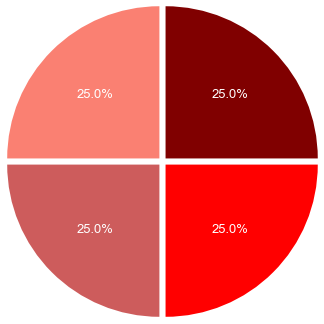

In [59]:
# Checking price_range Distribution
PR = round(df['price_range'].value_counts(normalize=True) * 100,2)
x = PR.index
y = PR.values
plt.figure(figsize=(12,5))  
plt.pie(y, colors=['maroon','salmon','indianred','red'],labels=x, 
       startangle=0,
        textprops={'size': 13, 'color' : 'white'},
        autopct="%1.1f%%",
        radius = 1.4,explode=(.04,.04,.04,.04));

plt.show()

> The distribution of the price_range are distributed evenly.

Ram vs Price

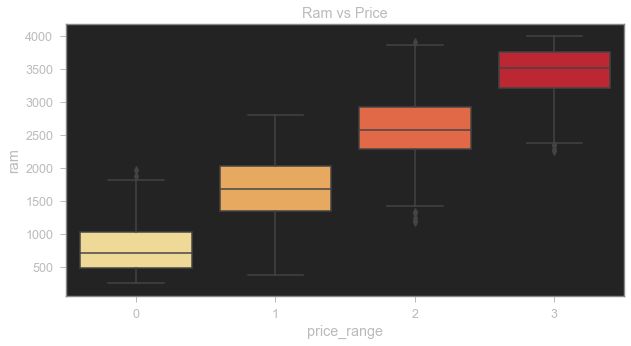

In [462]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='price_range', y='ram', palette='YlOrRd');
plt.title('Ram vs Price')
plt.show()

In [92]:
# df.groupby('price_range')[['ram']].median()

Ram is indeed influence the price of a phone, phone from 3000 up to 4000 mb ram are in the 3rd price range which indicates a very high cost phone

In [116]:
# df.groupby('price_range')[['int_memory']].median()

 ### Internal Memory vs Price

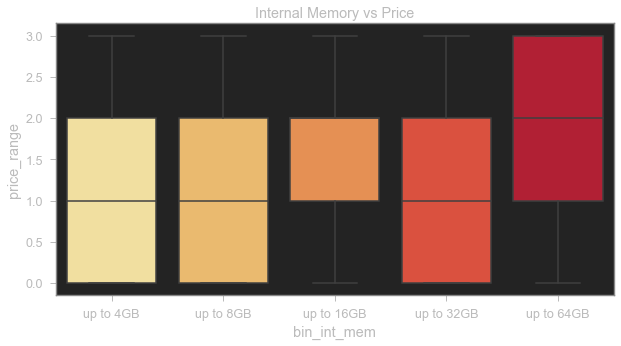

In [463]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1, y='price_range', x='bin_int_mem', palette='YlOrRd');
plt.title('Internal Memory vs Price')
plt.show()

- Internal Memory indeed influence the price of a phone.  
- Phone with internal memory up to 64gb are likely in the higher range of price.

### Cores of Processor vs Price

In [209]:
pd.crosstab(index=df['n_cores'], columns =df['price_range'],normalize='index')*100

price_range,0,1,2,3
n_cores,,,,
1,20.247934,31.404959,21.487603,26.859504
2,27.935223,23.886640,23.076923,25.101215
3,25.203252,28.048780,22.764228,23.983740
4,24.452555,27.737226,26.642336,21.167883
5,23.983740,20.731707,26.829268,28.455285
6,26.521739,23.478261,24.782609,25.217391
7,25.482625,21.235521,26.640927,26.640927
8,26.171875,23.437500,27.343750,23.046875


In [162]:
pd.crosstab(index=df['n_cores'], columns =df['price_range'],margins=True)

price_range,0,1,2,3,All
n_cores,,,,,
1,49,76,52,65,242
2,69,59,57,62,247
3,62,69,56,59,246
4,67,76,73,58,274
5,59,51,66,70,246
6,61,54,57,58,230
7,66,55,69,69,259
8,67,60,70,59,256
All,500,500,500,500,2000


n_cores doesnt affect the price that much
- Phone with 5 n_cores sold at most in price range 3 (very high cost) with 28.4% of share
- Phone with highest n_cores (8) sold at most in price range 2 (high cost) with 27.3% of share

### Primary Camera vs Price

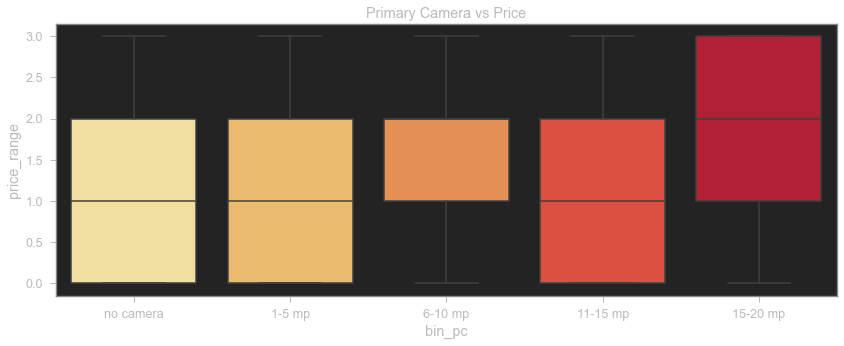

In [465]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df1, x='bin_pc', y='price_range', palette='YlOrRd');
plt.title('Primary Camera vs Price')
plt.show()

- From the above graph, it shows that primary camera are slightly influence the phone price.
- 15-20 mp phones are in the higher price range.

### Front Camera vs Price

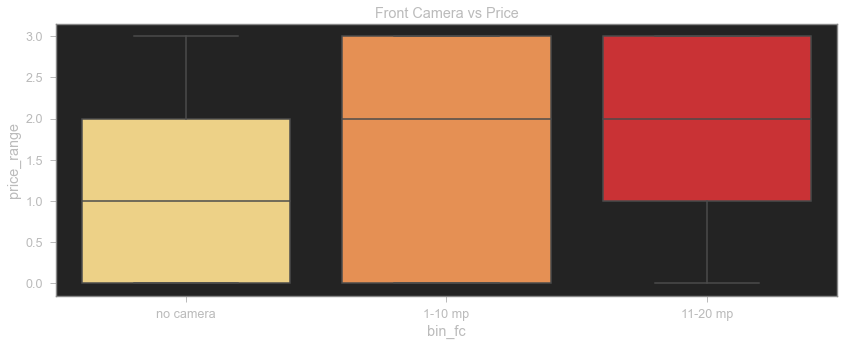

In [467]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df1, x='bin_fc', y='price_range', palette='YlOrRd');
plt.title('Front Camera vs Price')
plt.show()

- Front camera indeed shows influence on the phone price.
- Phone with 11-20 mp in the higher price range than others.

In [474]:
# checking the outliers in fc

plt.figure(figsize=(17,5))
sns.scatterplot(data=df, x='fc', y='ram', hue='price_range', palette='YlOrRd');

# We can see that the reason there are some phone with high spec front camera were in the low price range because the ram is lower than 1000mb

### Battery Power vs Price

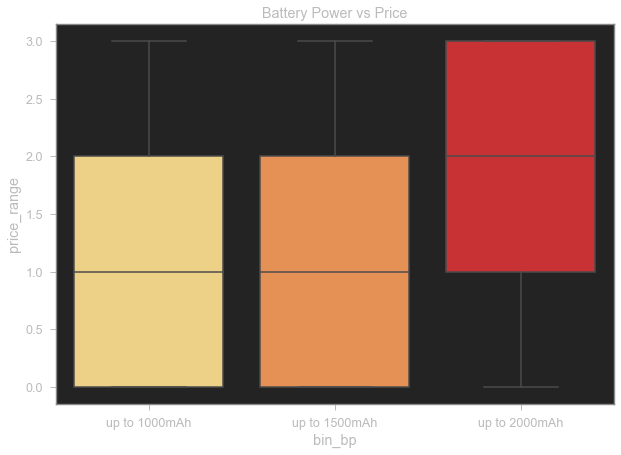

In [476]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1, y='price_range', x='bin_bp', palette='YlOrRd');
plt.title('Battery Power vs Price')
plt.show()

- Battery power also shows slight influence on the phone price.
- Phone with battery power 1500 up to 2000mAh are in the higher price range than others.

### Mobile Weight vs Price

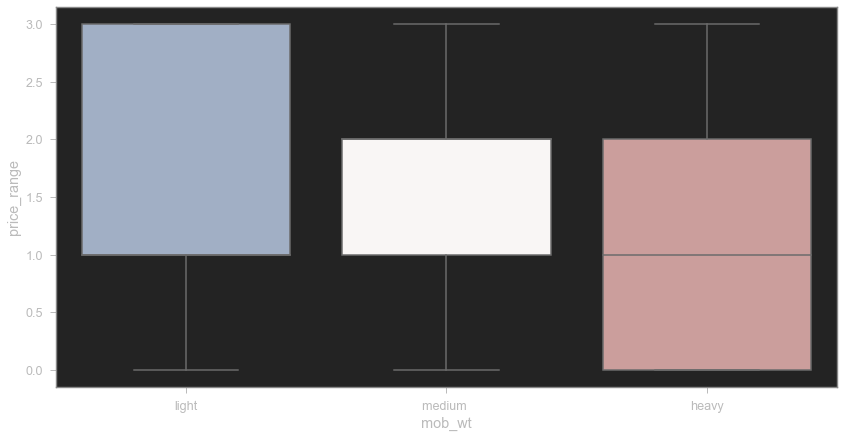

In [273]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df1, y='price_range', x='mob_wt', palette='vlag');

And base on the mobile weight, it shows that the lighter the phone the higher the price.

# Conclusion
- Ram and mobile weight are heavily influence the price of a phone.  
    - Phones with ram in range of 500mb - 1gb are in low cost phone (0)
    - Phones with ram in range of 1gb - 2gb are in medium cost phone (1)
    - Phones with ram in range of 2gb - 3gb are in high cost phone (2)
    - Phones with ram in range of 3gb - 4gb are in very high cost phone (3)

- Mobile weight are also heavily influence the price of a phone
    - Phone that in category light weight phone are in price range 1-3 (medium to very high cost)
    - Phone that in category medium weight phone are in price range 1-2 (medium to  high cost)
    - Phone that in category heavy weight phone are in price range 0-2 (low to  medium cost)

- Whilst, int_memory, n_cores, pc, fc and battery_power are indeed have a slight influence on the mobile phone price.
    - Phone with primary and fron camera higher than 10 megapixels are in the higher price range (medium to very high cost)
    - Phone with internal memory higher than 32 gb up to 64gb are also in medium to very high cost price range
    - And batter power of phone more than 1500mAh are also in medium to very high cost price range

# Suggestion  

- Base on the conclusion, If the phone of Bob's company creates have ram of 4gb and its in the medium weight category with 15mp of primary camera and front camera, battery power more than 1500mAh, Bob should put the phone on the very high cost price range tag.  
- The company can use the guideline from the conclusion above to estimate their phones price range.  
- If Bob wants to give a big fight to companies like Apple and Samsung, he needs to make a phone around 3-4gb ram and in light/medium weight category, int_memory of 32-64gb, battery_power around 1600 mAh and slightly lower the megapixels of pc and fc and lower all other features then put a fight in medium to high cost price range.

In [58]:
# df1.to_csv(r'D:\Belajar\Purwadhika\JCDS10\Data Science\Jupyter Notebook\3. Modul 3\TUGAS\MobilePhone.csv')